In [1]:
from mqt.yaqs.core.data_structures.networks import MPO

L = 16
J = 1
h = 1
H_0 = MPO()
# H_0.init_ising(L, J, h)
H_0.init_heisenberg(L, J, J, J, h)

In [2]:
from mqt.yaqs.core.data_structures.networks import MPS

state = MPS(L, state="Neel")

In [ ]:
from mqt.yaqs.core.data_structures.noise_model import NoiseModel

gamma = 1e-3
noise_model = NoiseModel([
      {"name": name, "sites": [i], "strength": gamma} for i in range(L) for name in ["pauli_z", "pauli_x", "pauli_y"]
  ])

SyntaxError: unterminated string literal (detected at line 5) (69537499.py, line 5)

In [ ]:
from mqt.yaqs.core.data_structures.simulation_parameters import Observable, AnalogSimParams

from mqt.yaqs.core.libraries.gate_library import Z

elapsed_time = 1.5
dt = 0.1
sample_timesteps = True
num_traj = 10
max_bond_dim = 2**L
min_bond_dim = 2
threshold = 1e-6
order = 1
measurements = [Observable(Z(), site) for site in range(L)]
sim_params = AnalogSimParams(measurements, elapsed_time, dt, num_traj, max_bond_dim, min_bond_dim, threshold, order, sample_timesteps=sample_timesteps)

In [ ]:
from mqt.yaqs import simulator

simulator.run(state, H_0, sim_params, noise_model, parallel=False)

102
102


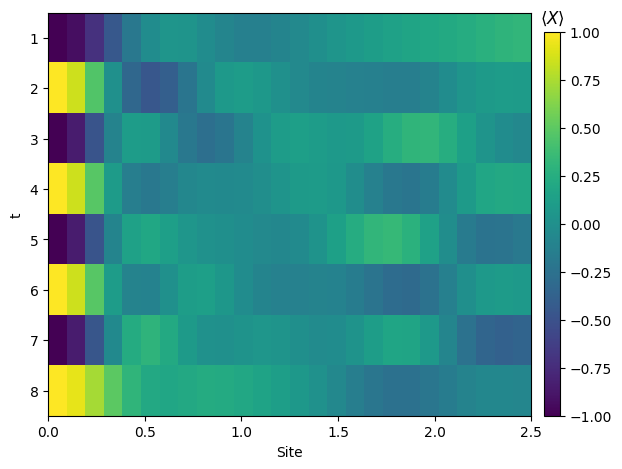

In [ ]:
import matplotlib.pyplot as plt

heatmap = [observable.results for observable in sim_params.observables]

fig, ax = plt.subplots(1, 1)
im = plt.imshow(heatmap, aspect="auto", extent=(0, elapsed_time, L, 0))
plt.xlabel("Site")
plt.yticks([x - 0.5 for x in list(range(1, L + 1))], [str(x) for x in range(1, L + 1)])
plt.ylabel("t")

fig.subplots_adjust(top=0.95, right=0.88)
cbar_ax = fig.add_axes(rect=(0.9, 0.11, 0.025, 0.8))
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.set_title("$\\langle X \\rangle$")

plt.show()